# Demo for the DoWhy causal API
We show a simple example of adding a causal extension to any dataframe. 

In [1]:
import dowhy.datasets
import dowhy.api

import numpy as np
import pandas as pd

from statsmodels.api import OLS

In [2]:
data = dowhy.datasets.linear_dataset(beta=5,
        num_common_causes=1,
        num_instruments = 0,
        num_samples=1000,
        treatment_is_binary=True)
df = data['df']
df['y'] = df['y'] + np.random.normal(size=len(df)) # Adding noise to data. Without noise, the variance in Y|X, Z is zero, and mcmc fails.
#data['dot_graph'] = 'digraph { v ->y;X0-> v;X0-> y;}'

treatment= data["treatment_name"][0]
outcome = data["outcome_name"][0]
common_cause = data["common_causes_names"][0]
df

,W0,v0,y
0,-0.258643,False,0.270686
1,0.454303,True,5.979422
2,-0.403510,False,0.232969
3,-0.374028,True,2.706533
4,0.922220,True,7.867688
...,...,...,...
995,-1.483949,False,-5.053757
996,-1.767764,False,-4.560044
997,-1.129240,False,-3.634375
998,-0.434160,False,-0.905667


<AxesSubplot:xlabel='v0'>

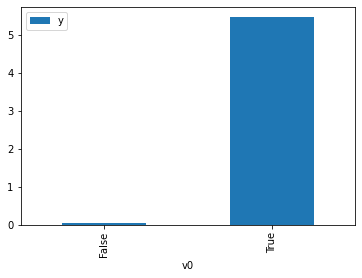

In [3]:
# data['df'] is just a regular pandas.DataFrame
df.causal.do(x=treatment,
                     variable_types={treatment: 'b', outcome: 'c', common_cause: 'c'},
                     outcome=outcome,
                     common_causes=[common_cause],
                     proceed_when_unidentifiable=True).groupby(treatment).mean().plot(y=outcome, kind='bar')

<AxesSubplot:xlabel='v0'>

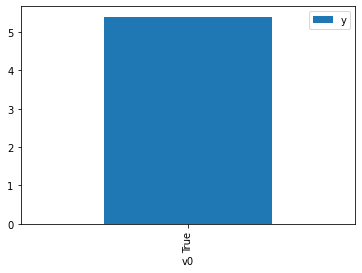

In [4]:
df.causal.do(x={treatment: 1}, 
              variable_types={treatment:'b', outcome: 'c', common_cause: 'c'}, 
              outcome=outcome,
              method='weighting', 
              common_causes=[common_cause],
              proceed_when_unidentifiable=True).groupby(treatment).mean().plot(y=outcome, kind='bar')

In [5]:
cdf_1 = df.causal.do(x={treatment: 1}, 
              variable_types={treatment: 'b', outcome: 'c', common_cause: 'c'}, 
              outcome=outcome, 
              dot_graph=data['dot_graph'],
              proceed_when_unidentifiable=True)

cdf_0 = df.causal.do(x={treatment: 0}, 
              variable_types={treatment: 'b', outcome: 'c', common_cause: 'c'}, 
              outcome=outcome, 
              dot_graph=data['dot_graph'],
              proceed_when_unidentifiable=True)


In [6]:
cdf_0

,W0,v0,y,propensity_score,weight
0,0.816094,False,1.686673,0.197533,5.062433
1,1.140520,False,2.605438,0.118383,8.447168
2,-0.153549,False,-0.683939,0.600988,1.663926
3,-0.322642,False,-1.845678,0.673809,1.484100
4,-0.027045,False,0.354762,0.543209,1.840914
...,...,...,...,...,...
995,-0.042365,False,0.462657,0.550301,1.817189
996,-0.079335,False,-0.502332,0.567325,1.762657
997,1.903546,False,5.700887,0.031273,31.976365
998,0.704213,False,1.576448,0.232762,4.296229


In [7]:
cdf_1

,W0,v0,y,propensity_score,weight
0,0.103197,True,4.728649,0.517502,1.932360
1,-0.050658,True,3.458431,0.445869,2.242811
2,-0.119008,True,6.609158,0.414581,2.412075
3,-0.038747,True,6.093210,0.451373,2.215464
4,3.226027,True,12.332965,0.997278,1.002729
...,...,...,...,...,...
995,-1.020697,True,2.135535,0.116142,8.610153
996,0.651539,True,6.498636,0.749206,1.334747
997,0.257338,True,5.345168,0.588552,1.699085
998,0.058778,True,5.859101,0.496765,2.013025


## Comparing the estimate to Linear Regression
First, estimating the effect using the causal data frame, and the 95% confidence interval.

In [8]:
(cdf_1['y'] - cdf_0['y']).mean()

/home/amshar/python-environments/vpy38/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/amshar/python-environments/vpy38/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/amshar/python-environments/vpy38/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/amshar/python-environments/vpy38/lib/pyth

In [9]:
1.96*(cdf_1['y'] - cdf_0['y']).std() / np.sqrt(len(df))

/home/amshar/python-environments/vpy38/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/amshar/python-environments/vpy38/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/amshar/python-environments/vpy38/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/amshar/python-environments/vpy38/lib/pyth

Comparing to the estimate from OLS.

In [10]:
model = OLS(np.asarray(df[outcome]), np.asarray(df[[common_cause, treatment]], dtype=np.float64))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                          1.301e+04
Date:                Sat, 16 Jul 2022   Prob (F-statistic):                        0.00
Time:                        08:46:20   Log-Likelihood:                         -1451.4
No. Observations:                1000   AIC:                                      2907.
Df Residuals:                     998   BIC:                                      2917.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.7189      0.036     75.912      0.000       2.649       2.789
x2             4.9698      0.052     95.102      0.000       4.867       5.072
==============================================================================
Omnibus:                        2.109   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.348   Jarque-Bera (JB):                2.082
Skew:                           0.112   Prob(JB):                        0.353
Kurtosis:                       2.998   Cond. No.                         1.84
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""